In [19]:
### Import libs

import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

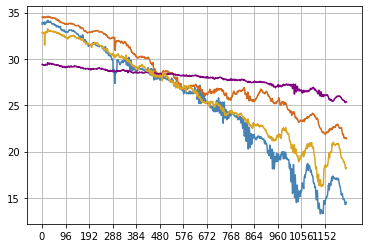

In [2]:
b1=pd.read_csv("Box1_Temoin.csv",index_col="X")
b2=pd.read_csv("Box2_Stress_hydrique.csv",index_col="X")
b3=pd.read_csv("Box3_stress_salin.csv",index_col="X")
b4=pd.read_csv("Box4_Temoin.csv",index_col="X")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
minor_ticks = np.arange(0, 1201, 96)
ax.set_xticks(minor_ticks)
ax.plot(b1,c='steelblue')
ax.plot(b2,c='chocolate')
ax.plot(b3,c='purple')
ax.plot(b4,c='goldenrod')
ax.grid(which='both')


In [3]:
b1

,Y
X,
1,33.7466
2,33.9566
3,33.8626
4,33.8590
5,33.8908
...,...
1235,14.2989
1236,14.2970
1237,14.3038


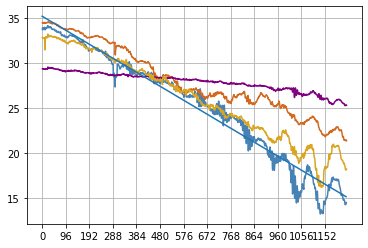

In [4]:
m1=LinearRegression()
x=np.array(list(b1.index))[np.newaxis].T
y=np.array(list(b1["Y"]))[np.newaxis].T
m1.fit(x,y)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
minor_ticks = np.arange(0, 1201, 96)
ax.set_xticks(minor_ticks)
ax.plot(b1,c='steelblue')
ax.plot(b2,c='chocolate')
ax.plot(b3,c='purple')
ax.plot(b4,c='goldenrod')
ax.plot(m1.predict(x))
ax.grid(which='both')


In [26]:
T0=96
x=list(b1.index)
c=[] #




for k in range(len(x)//96):
    mk=LinearRegression()
    pk=np.array(list(b1.index)[(k*T0):((k+1)*T0)]) # t sur la kieme periode
    xk=pk[np.newaxis].T # t sur la kieme periode (reshape)
    yk=np.array(list(b1["Y"]))[(k*T0):((k+1)*T0)][np.newaxis].T # y sur la kieme periode
    mk.fit(xk,yk) # regression
    tk=mk.predict(xk) # trend
    dk=yk-tk # signal detrend
    uk=np.array(list(dk.T)[0]) # signal detrend (reshape)
    a1n=(2/T0)*np.trapz(uk*np.cos(2*m.pi*pk/T0)*(pk[1]-pk[0]))
    b1n=(2/T0)*np.trapz(uk*np.sin(2*m.pi*pk/T0)*(pk[1]-pk[0]))
    c1n=np.sqrt(a1n**2+b1n**2)
    En=(1/T0)*np.trapz((uk**2)*(pk[1]-pk[0]))
    print(En,c1n)
    HDRn=np.sqrt((En-(c1n**2)/2)/((c1n**2)/2))
    print(HDRn)
    
    c+=list(mk.predict(xk))
    
    
    

0.02203103895829792 0.1643752554130298
0.7942088323502285
0.03992807684453671 0.21081724141954272
0.8926281944141681
0.04657802439900394 0.24195431685590768
0.7689418651549842
0.2987268841796573 0.5717775447188457
0.9096534510439218
0.05613318395241999 0.1676538688481932
1.7303562962341599
0.031719666032466384 0.13104884068226347
1.6413288510920176
0.12447565795727294 0.22259630809391864
2.0060743051266945
0.2017840852245844 0.12193562438751883
5.1130094267069195
0.2709949360331142 0.20340125211628998
3.4785601929444767
0.21332779801296692 0.31040467521070575
1.8515225830449198
0.618805856944818 0.6314482238290248
1.450485630723604
1.17425094292067 1.1839266782072833
0.8218807175960399


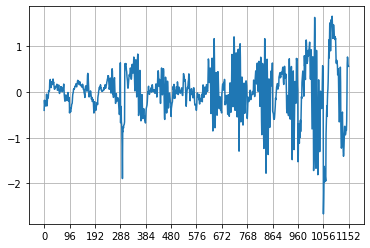

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
minor_ticks = np.arange(0, 1201, 96)
ax.set_xticks(minor_ticks)
#ax.plot(b1,c='steelblue')
#ax.plot(b2,c='chocolate')
#ax.plot(b3,c='purple')
#ax.plot(b4,c='goldenrod')
#ax.plot(c,c='red')
ax.plot((np.array(list(b1['Y'][0:(12*96)])))-np.array(np.array(c).T[0]))
#print((np.array(list(b1['Y'][0:(12*96)]))-list(np.array(c)).shape)
ax.grid(which='both')